In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import joblib
import streamlit as st

In [2]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# Socioeconomic Score 사회경제적 점수,Study Hours 공부시간,
# Sleep Hours 수면 시간,Attendance(%) 출석률,Grades	성취 점수
data = pd.read_csv('../dataSet/data.csv')
data.head()
print(data.shape)

X = data.drop('Grades',axis=1)
y= data['Grades']



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

(1388, 5)


In [4]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [5]:
y_predict = model.predict(X_test)
y_mes = mean_squared_error(y_test,y_predict)
y_r2 = r2_score(y_test,y_predict)

print(f'MES: {y_mes}, R2:{y_r2}')

MES: 19.27253772875125, R2:0.7446674729714069


In [6]:
# 어떤 모델 쓸 것인지 비교 LogisticRegression 과 RandomForestRegressor
models={
    'LogisticRegression':LogisticRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [7]:
results={}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_preict_re = model.predict(X_test)
    mse = mean_squared_error(y_test,y_preict_re)
    r2 = r2_score(y_test,y_preict_re)
    results[name] ={'MSE':mse,'R2':r2}
    print(f'{name}=>MSE:{mse},R2:{r2}')

c:\study_python_3106\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression=>MSE:38.985611510791365,R2:0.483498496933525
RandomForestRegressor=>MSE:1.44924928057554,R2:0.9807995975251517


In [ ]:
results['LinearRegression'] ={'MSE':y_mes,'R2':y_r2}
best_model =max(results,key=lambda x: results[x]['R2'])
best_model

In [9]:
# 촣은 모델 찾는 거 시각화
bs_r2=[]
for result in results.values():
    bs_r2.append(result['R2'])
print(bs_r2)
models_name = list(results.keys())

[0.483498496933525, 0.9807995975251517, 0.7446674729714069]


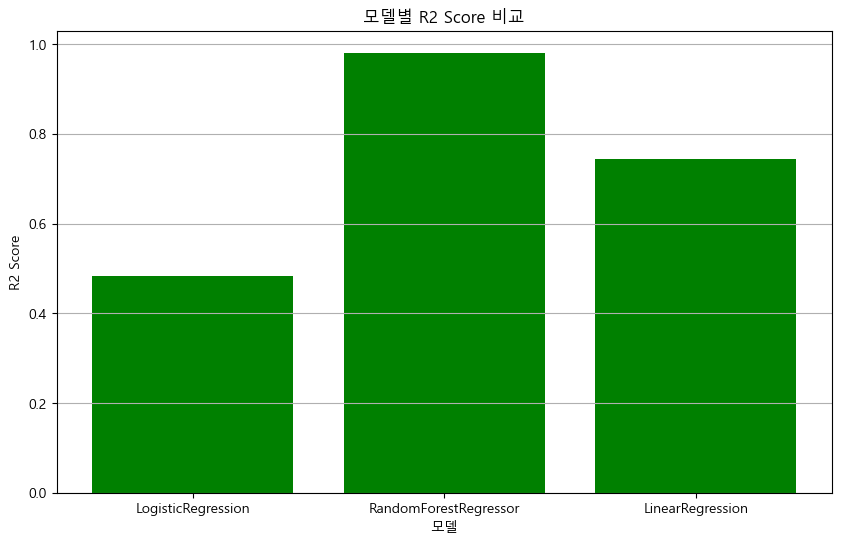

In [10]:
plt.figure(figsize=(10,6))
plt.bar(models_name,bs_r2,color='green')
plt.xlabel('모델')
plt.ylabel('R2 Score')
plt.title('모델별 R2 Score 비교')
plt.grid(axis='y')
plt.show()

In [11]:
# RandomForestRegressor 모델로 결정!
X = data.drop('Grades',axis=1)
y= data['Grades']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf_model = RandomForestRegressor(random_state=42,n_estimators=100)
rf_model.fit(X_train,y_train)
y_rf_predict = rf_model.predict(X_test)

In [12]:
rf_mse = results['RandomForestRegressor']['MSE']
rf_r2 = results['RandomForestRegressor']['R2']


C:\Users\human-07\AppData\Local\Temp\ipykernel_8220\3485931786.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2,color='blue')


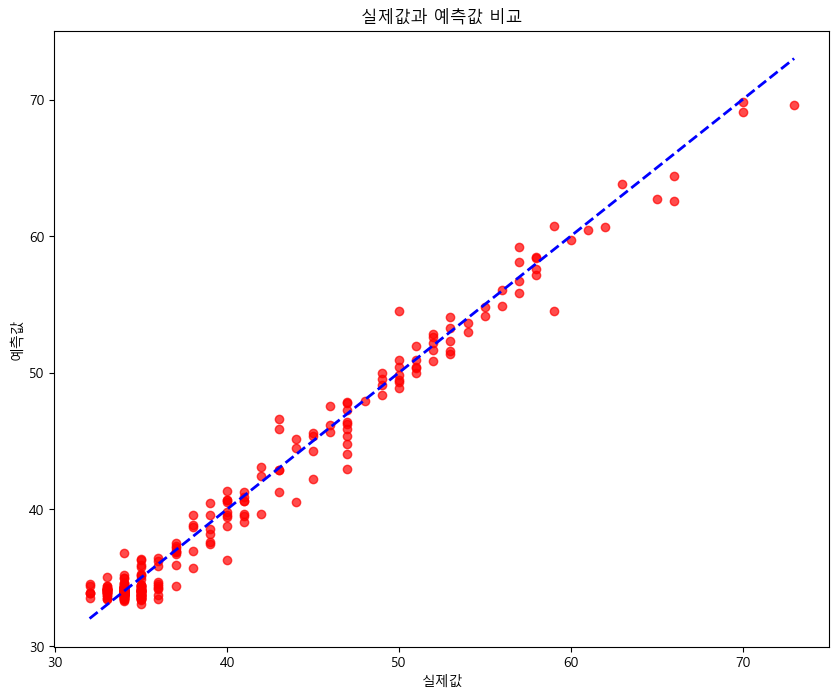

In [13]:
# 시각화(예측값과 실제값)
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_rf_predict,alpha=0.7,color='red')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2,color='blue')
plt.title('실제값과 예측값 비교')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.show()

In [14]:
# 특성 중요성
feature_importance = pd.DataFrame({
    "feature": X.columns,
    # 랜덤포레스트에서는 coef_사용 불가 대신 feature_importances_
    "importance":np.abs( rf_model.feature_importances_)
})
print("importance:",feature_importance['importance'])
feature_importance=feature_importance.sort_values('importance',ascending=True)

importance: 0    0.254405
1    0.733942
2    0.006057
3    0.005595
Name: importance, dtype: float64


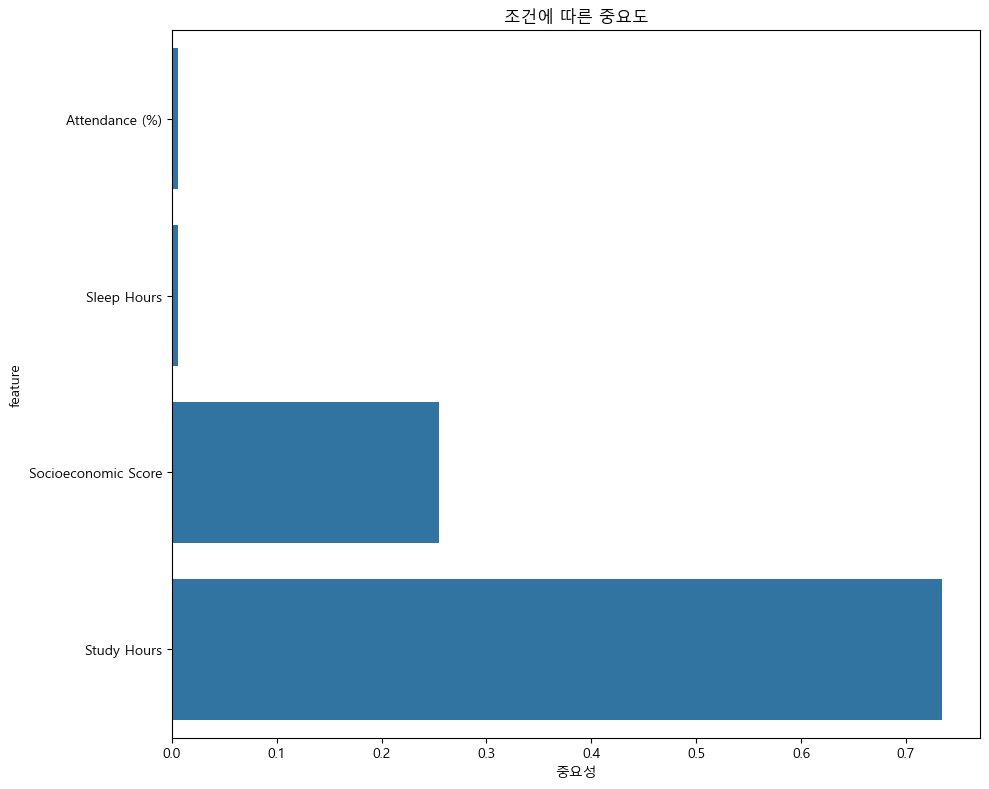

In [15]:
# 시각화(특성별 중요성)
plt.figure(figsize=(10,8))
sns.barplot(x='importance',y='feature',data=feature_importance)
plt.title('조건에 따른 중요도')
plt.xlabel('중요성')
plt.tight_layout()
plt.show()

In [16]:
# 모델 저장
joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [17]:
# 3. Streamlit 앱
st.title('성취점수 예측 시스템')
st.write('사회경제적 점수, 공부시간, 수면 시간, 출석률 값을 입력하여 예측을 해보세요.')

2025-01-07 09:08:51.431 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:08:52.081 
  command:

    streamlit run c:\study_python_3106\.venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-07 09:08:52.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:08:52.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:08:52.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:08:52.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:08:52.085 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [18]:
# 사용자 입력받기
Socioeconomic = st.slider('Socioeconomic Score (사회경제적 점수)', min_value=0.0, max_value=1.0, value=0.1,step=0.1)
Study = st.slider('Study Hours (공부시간)', min_value=0.0, max_value=10.0, value=1.5, step=0.1)
Sleep = st.slider('Sleep Hours (수면 시간)', min_value=1, max_value=10, value=1)
Attendance = st.slider('Attendance (%) (출석률)', min_value=10, max_value=100, value=10)

2025-01-07 09:08:53.929 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:08:53.930 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:08:53.930 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:08:53.931 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:08:53.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:08:53.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:08:53.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:08:53.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [22]:
# 비교값 - 주어진 데이터 타켓의 평균
mean =np.mean(y)
# 예측하기 버튼
if st.button('예측하기'):
    # 입력값을 모델에 전달
    model = joblib.load('diabetes_model.pkl')
    input_data = np.array([[Socioeconomic,Study,Sleep,Attendance]])
    prediction = model.predict(input_data)[0]



    # 결과 출력
    if prediction >= mean:
        st.write('예측 결과: 성취점수가 평균보다 높아 높은 점수를 얻을 가능성이 높습니다.')
    else:
        st.write('예측 결과: 성취점수가 평균보다 낮아 높은 점수를 얻을 가능성이 낮습니다.')

2025-01-07 09:09:03.121 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:09:03.122 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:09:03.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:09:03.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 09:09:03.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
